In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# from zipfile import ZipFile
# file_name = 'archive.zip'
# with ZipFile(file_name,'r') as zip:
#   zip.extractall()
#   print("Done..")

## Libraries

In [2]:
import cv2
import os
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models

## Preprocessing

In [3]:
d = os.path.join("/content/gdrive/MyDrive/Dataset/Training_Data(Resized)")
classes = ['Glass', 'Metal', 'Paper', 'Plastic', 'Trash']

In [4]:
for label in classes:
    directory = os.path.join(d, label)
    print("Images of label \"" + label + "\":\t", len(os.listdir(directory)))

Images of label "Glass":	 659
Images of label "Metal":	 592
Images of label "Paper":	 597
Images of label "Plastic":	 666
Images of label "Trash":	 256


In [5]:
data=[]
for c in classes:
    i=classes.index(c)
    path=os.path.join(d,c)
    for img in os.listdir(path):
        im=cv2.imread(os.path.join(path,img))
        im=cv2.resize(im,(224,224))
        data.append([im,i])

In [7]:
data=np.array(data)
import random
random.shuffle(data)

<ipython-input-7-eb3a6eb15208>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data=np.array(data)


In [8]:
X=[]
Y=[]
for x,y in data:
    X.append(x)
    Y.append(y)

In [9]:
x=np.array(X)
y=np.array(Y)
print(x.shape,y.shape)

(2770, 224, 224, 3) (2770,)


In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=4, stratify=y)

In [11]:
x_train = x_train / 255.0
x_test = x_test / 255.0

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(1662, 224, 224, 3) (1662,)
(1108, 224, 224, 3) (1108,)


## Build Model

In [12]:
model_mobileNet=tf.keras.applications.mobilenet_v2.MobileNetV2(
    input_shape=None,
    alpha=1.0,
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)

14536120/14536120 [==============================] - 0s 0us/step


In [13]:
model_mobileNet.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [14]:
base_input1=model_mobileNet.layers[0].input
base_output1=model_mobileNet.layers[-2].output

final_output1 = layers.Dense(128)(base_output1)
final_output1 = layers.Activation('relu')(final_output1)
final_output1 = layers.Dense(64)(final_output1)
final_output1 = layers.Activation('relu')(final_output1)
final_output1 = layers.Dense(5, activation='softmax')(final_output1)

In [15]:
new_model_mobileNet = tf.keras.Model(inputs = base_input1, outputs = final_output1)

In [16]:
new_model_mobileNet.compile(loss="sparse_categorical_crossentropy", optimizer = "SGD", metrics = ["accuracy"])

## Train Model

In [17]:
history=new_model_mobileNet.fit(x_train, y_train, epochs = 20,validation_data=(x_test, y_test))

Epoch 1/20
52/52 [==============================] - 49s 411ms/step - loss: 0.7171 - accuracy: 0.7593 - val_loss: 0.8867 - val_accuracy: 0.6561
Epoch 2/20
52/52 [==============================] - 8s 151ms/step - loss: 0.1680 - accuracy: 0.9633 - val_loss: 0.8186 - val_accuracy: 0.6895
Epoch 3/20
52/52 [==============================] - 9s 170ms/step - loss: 0.0757 - accuracy: 0.9844 - val_loss: 0.7814 - val_accuracy: 0.7202
Epoch 4/20
52/52 [==============================] - 9s 180ms/step - loss: 0.0359 - accuracy: 0.9952 - val_loss: 0.6536 - val_accuracy: 0.7644
Epoch 5/20
52/52 [==============================] - 8s 153ms/step - loss: 0.0237 - accuracy: 0.9970 - val_loss: 0.6338 - val_accuracy: 0.7771
Epoch 6/20
52/52 [==============================] - 8s 157ms/step - loss: 0.0194 - accuracy: 0.9964 - val_loss: 0.5432 - val_accuracy: 0.8087
Epoch 7/20
52/52 [==============================] - 9s 179ms/step - loss: 0.0126 - accuracy: 1.0000 - val_loss: 0.5136 - val_accuracy: 0.8132
Epoch

## Accuracy

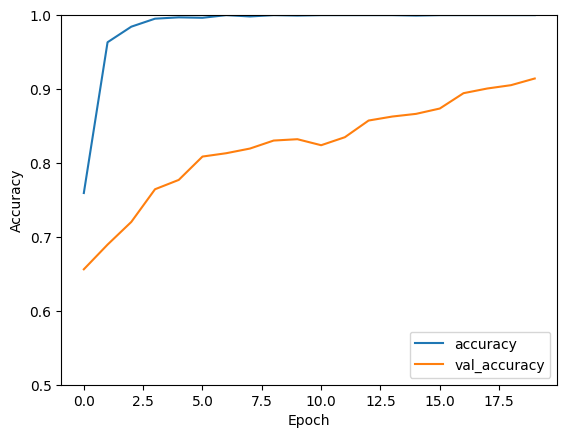

In [20]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

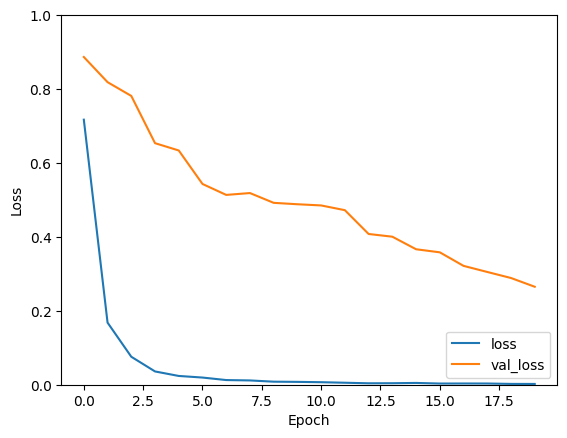

In [21]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [22]:
loss , accuracy = new_model_mobileNet.evaluate(x_test,y_test)

35/35 [==============================] - 2s 46ms/step - loss: 0.2651 - accuracy: 0.9143


In [23]:
y_pred = new_model_mobileNet.predict(x_test).round(2)

35/35 [==============================] - 3s 44ms/step


[[640   0   0   0   0]
 [ 44 218   1   0   0]
 [ 10   3 118   1   1]
 [ 29   0   0  37   0]
 [  4   2   0   0   0]]


<Axes: >

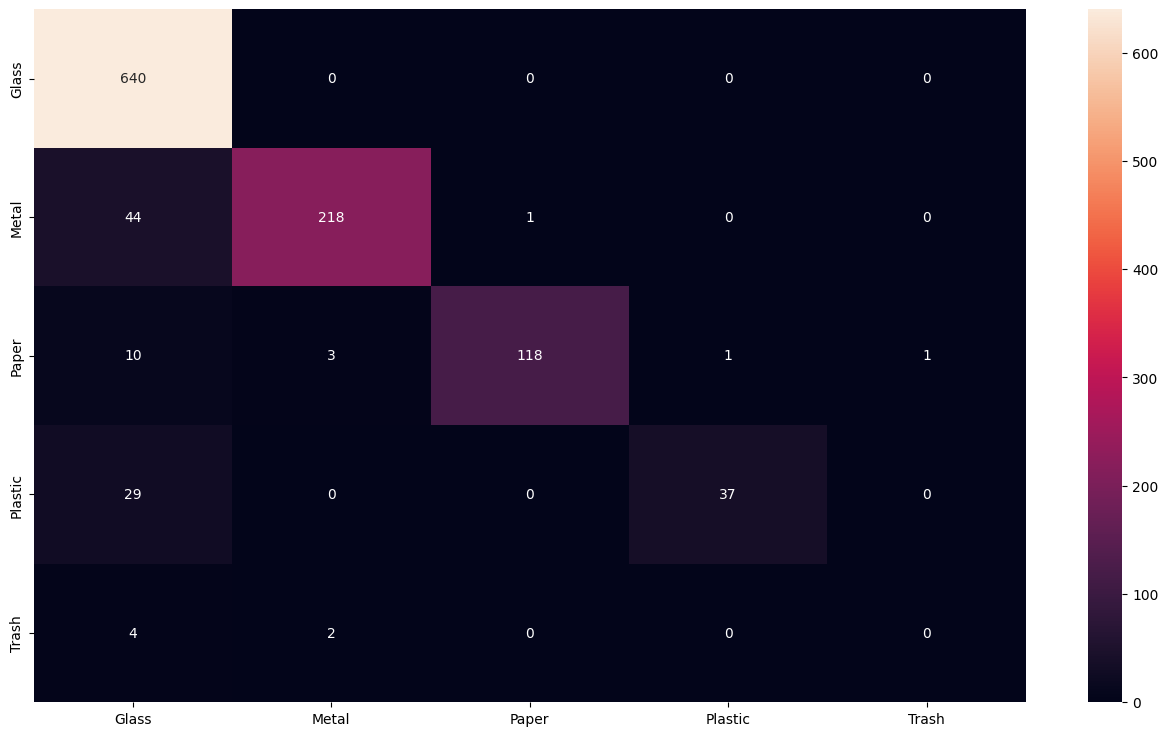

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


plt.figure(figsize=(16,9))
y_pred_labels = [np.argmax(label) for label in y_pred]
cm = confusion_matrix(y_test, y_pred_labels)
print(cm)

sns.heatmap(cm, annot=True, fmt='d', xticklabels=classes, yticklabels=classes)

In [25]:
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=classes)
print(cr)

              precision    recall  f1-score   support

       Glass       0.88      1.00      0.94       640
       Metal       0.98      0.83      0.90       263
       Paper       0.99      0.89      0.94       133
     Plastic       0.97      0.56      0.71        66
       Trash       0.00      0.00      0.00         6

    accuracy                           0.91      1108
   macro avg       0.76      0.66      0.70      1108
weighted avg       0.92      0.91      0.91      1108



# Save The Model

In [ ]:
# serialize model to JSON
model_json = new_model_mobileNet.to_json()
with open("MobileNet_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
new_model_mobileNet.save_weights("MobileNet_model.h5")

## Saving Model In Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls "/content/gdrive/My Drive"

 A			 'Final Year Project'	      Mysql
'Academic Research'	 'First Project(100 Ideas)'   Pendrive
'All software'		 'Higher Study'		      Personal
 Andriod_development	 'ICT-9th batch'	      Programming
'Android Development'	  IDM			     'Programming Tutorials'
 Anik			  Job			      Projects
'Certificates & papers'  'Machine Learning'	      Robotics
 Classroom		  Marrige		     'Robotics Project'
'Colab Notebooks'	 'ML Data'		      Robot_Software
'Deep Learning'		 'M. Learning'		      server
 Diary			  Movies		     'Social Life'
 English		  Mridul		     'web development'
 Extra			 'My IELTS'


In [19]:
model_json = new_model_mobileNet.to_json()
with open("/content/gdrive/My Drive/Colab Notebooks/MobileNet_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
new_model_mobileNet.save_weights("/content/gdrive/My Drive/Colab Notebooks/MobileNet_model.h5")

In [ ]:
!ls "/content/gdrive/My Drive/Colab Notebooks"

Class.ipynb	       DenseNet1_model.json		 test.ipynb
DenseNet1_Colab.ipynb  garbage-classification-cnn.ipynb  Untitled0.ipynb
DenseNet1_model.h5     rese.ipynb
